## This dataset is collected from a survey conducted in japan in which data is collected from various professions and we are going to analyze the stress levels of them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as stmo


In [2]:
ji=r"C:\Users\pavan\OneDrive\Desktop\Psychological.csv"
df=pd.read_csv(ji)
df.head(10)

,ID,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
0,1,2,1,65,1,4,2,2,2,2.0,...,2,7,4,4,3,5,5,3,4,4
1,2,7,1,55,2,1,2,2,2,4.0,...,3,4,4,4,4,4,4,4,4,3
2,3,3,1,60,2,1,2,2,2,3.0,...,1,7,2,7,3,4,5,2,4,7
3,4,5,1,57,2,1,2,1,2,4.0,...,1,7,4,1,1,1,1,1,1,1
4,5,7,1,53,2,1,2,1,2,4.0,...,5,5,4,4,5,5,5,5,5,5
5,6,2,2,56,2,1,2,2,2,7.0,...,6,7,5,1,1,1,1,1,1,1
6,7,4,1,59,2,1,2,2,2,7.0,...,2,5,5,3,3,4,3,3,2,2
7,8,5,2,57,2,2,2,2,2,10.0,...,5,7,3,4,1,5,5,1,5,1
8,9,6,2,66,1,2,2,2,2,7.0,...,6,7,4,2,1,4,5,1,1,4
9,10,5,1,51,2,1,2,2,1,2.0,...,4,4,4,4,4,4,4,4,4,4


The below values are generally what the categorical values are for each column in the main table
(K6-Kessler Distress Score)

In [72]:
ji=r"C:\Users\pavan\OneDrive\Desktop\key.csv"
key=pd.read_csv(ji)
key.set_index('Items',inplace=True)
key

,Comments
Items,
Residence,"1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chib..."
Sex,"1 = male, 2 = female"
Age,Age in responding the questionnaire
Age_Group,"1 = ≥65 yrs., 2 = 40-64 yrs., 3 = 20-39 yrs., ..."
Job_Group,"1 = employed, 2 = home maker, 3 = student, 4 =..."
Health_Worker_Self,"""Are you a healthcare worker?"" 1 = yes, 2 = no"
Health_Worker_Family,"""Is your family member a healthcare worker?"" 1..."
Married,"1 = single, 2 = married"
Income,"Annual household income (JPY), 1 = < 2 million..."


In [4]:
df.set_index('ID',inplace=True)
df

,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,Current_Physical,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,65,1,4,2,2,2,2.0,2,...,2,7,4,4,3,5,5,3,4,4
2,7,1,55,2,1,2,2,2,4.0,2,...,3,4,4,4,4,4,4,4,4,3
3,3,1,60,2,1,2,2,2,3.0,2,...,1,7,2,7,3,4,5,2,4,7
4,5,1,57,2,1,2,1,2,4.0,2,...,1,7,4,1,1,1,1,1,1,1
5,7,1,53,2,1,2,1,2,4.0,2,...,5,5,4,4,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11329,7,1,37,3,5,2,2,1,NaN,2,...,1,7,7,7,1,4,7,4,1,1
11330,3,2,41,2,1,2,2,1,NaN,2,...,2,5,4,4,4,5,5,4,3,6
11331,3,1,52,2,1,2,2,2,NaN,1,...,1,7,4,7,1,5,6,5,6,7


In [71]:
df.isnull().sum()

Residence                 0
Sex                       0
Age                       0
Age_Group                 0
Job_Group                 0
Health_Worker_Self        0
Health_Worker_Family      0
Married                   0
Income                    0
Current_Physical          0
Past_Physical             0
Current_Mental            0
Past_Mental               0
K6                        0
PHQ9                      0
UCLA_LS3                  0
LSNS6                     0
Exercise                  0
Healthy_Diet              0
Healthy_Sleep             0
Activity                  0
Interaction_Offline       0
Interaction_Online        0
Preventive_Behaviors      0
Optimism                  0
Deterioration_Economy     0
Deterioration_Interact    0
Frustration               0
Covid_Anxiety             0
Covid_Sleepless           0
Difficulty_Living         0
Difficulty_Work           0
dtype: int64

There are many null values in the income column which we have to replace with the mean or median value

In [6]:
df.describe()

,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,Current_Physical,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
count,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,9626.000000,11333.000000,...,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000,11333.000000
mean,3.431219,1.524310,46.249801,2.230301,1.643431,1.941675,1.912556,1.621459,4.330355,1.957469,...,3.269302,5.576811,4.055943,3.795994,2.378629,3.311656,4.039707,2.442866,3.628607,3.821759
std,2.011036,0.499431,14.550446,0.673283,1.120443,0.234368,0.282497,0.485045,2.663295,0.201805,...,2.003088,1.665835,1.571918,1.827216,1.543015,1.754255,1.696952,1.536939,1.850859,2.050069
min,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,35.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,5.000000,3.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000
50%,3.000000,2.000000,46.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,6.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000
75%,5.000000,2.000000,57.000000,3.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,...,5.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
max,7.000000,2.000000,89.000000,4.000000,5.000000,2.000000,2.000000,2.000000,10.000000,2.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
df['Income']=df['Income'].replace(np.nan,7)

In [8]:
df

,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,Current_Physical,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,65,1,4,2,2,2,2.0,2,...,2,7,4,4,3,5,5,3,4,4
2,7,1,55,2,1,2,2,2,4.0,2,...,3,4,4,4,4,4,4,4,4,3
3,3,1,60,2,1,2,2,2,3.0,2,...,1,7,2,7,3,4,5,2,4,7
4,5,1,57,2,1,2,1,2,4.0,2,...,1,7,4,1,1,1,1,1,1,1
5,7,1,53,2,1,2,1,2,4.0,2,...,5,5,4,4,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11329,7,1,37,3,5,2,2,1,7.0,2,...,1,7,7,7,1,4,7,4,1,1
11330,3,2,41,2,1,2,2,1,7.0,2,...,2,5,4,4,4,5,5,4,3,6
11331,3,1,52,2,1,2,2,2,7.0,1,...,1,7,4,7,1,5,6,5,6,7


The key points to note from the paper are:
1. Lifestyle has changed
2. Loneliness is gradually increased in some and decreased in some of them
3. Diet and sleeping habits completely changed
4. Age,porefession are key factors

The above three points are very important and we can form hypothesis and check whether they are true or false 

Stress levels can vary in between between different age groups and can even vary in between different professions.We have to 
check them and visualize them.The range of K6 generally varies from 0 to 24 where 0 is lowest level of psychological non-specific distress and 24 is highest level of psychological non-specific distress.

Health_Worker_Self	 "Are you a healthcare worker?"  1 = yes,  2 = no

[Text(0.5, 1.0, 'K6 values for Health_Worker_Self vs Others')]

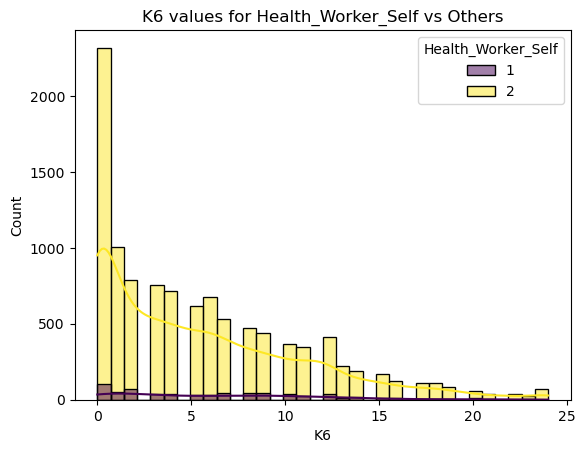

In [59]:
sns.histplot(data=df, x='K6', hue='Health_Worker_Self',kde=True,palette='viridis').set(title='K6 values for Health_Worker_Self vs Others')

[Text(0.5, 1.0, 'K6 values for Health_Worker_Family')]

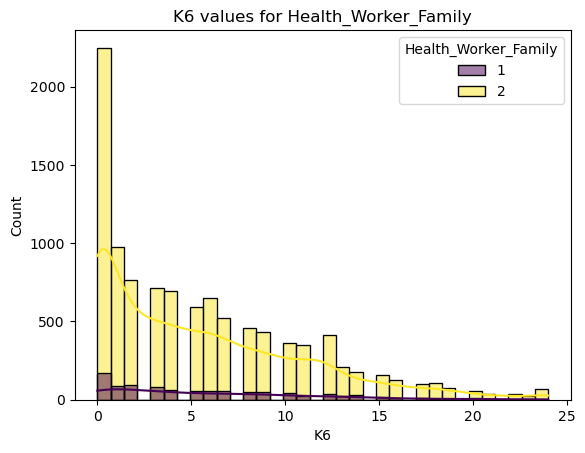

In [60]:
sns.histplot(data=df, x='K6', hue='Health_Worker_Family',kde=True,palette='viridis').set(title='K6 values for Health_Worker_Family')

In [10]:
#First we check the number of health workers
df['Health_Worker_Self'].value_counts()

Health_Worker_Self
2    10672
1      661
Name: count, dtype: int64

# Null Hypothesis:
We can observe that the stress levels in the case of health worker in family or himself,the stress levels are similar to that of other general people in the society.

In [11]:
print("Health Workers:661")
print("Non Health workers:10672")

Health Workers:661
Non Health workers:10672


<Axes: xlabel='Health_Worker_Self', ylabel='K6'>

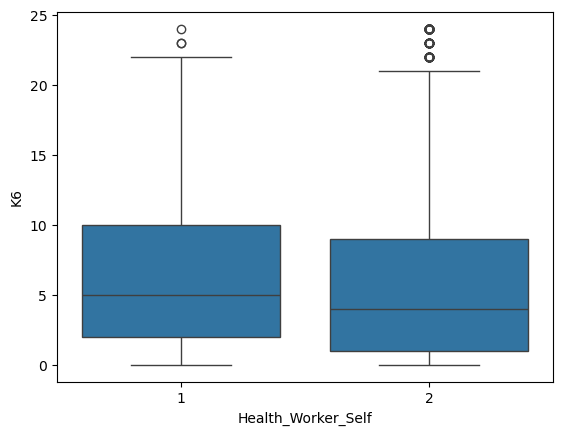

In [12]:
sns.boxplot(x='Health_Worker_Self',y='K6',data=df)

In [53]:
# As there are 1 variable with 2 categories and the data is non-parametric, we can use Mann-Whitney U test
healthcare=df[df['Health_Worker_Self']==1]['K6']
non_healthcare=df[df['Health_Worker_Self']==2]['K6']

In [54]:
from scipy.stats import mannwhitneyu 
stat,p_val=mannwhitneyu(healthcare,non_healthcare)
print("Statistics:",stat)
print("p_value is:=",p_val)

Statistics: 3858010.0
p_value is:= 4.5099926497445316e-05


In [55]:
significance=0.05
if(p_val<significance):
    print("Statistically significant,Reject Null Hypothesis")
else:
    print("Not significant")

Statistically significant,Reject Null Hypothesis


 Now we can analyze the lifestyle management of the people. For that we have to identify the characteristics that define the characteristics of lifestyle in mild lockdown.If we read the article there are 8 lifestyle habits or characteristics of each person.

In [58]:
# We can even find the mean value and estimate the differences from the above plot
print("Median K6 of healthcare workers:",healthcare.median())
print("Median K6 of non-healthcare workers:",non_healthcare.median())

Median K6 of healthcare workers: 5.0
Median K6 of non-healthcare workers: 4.0


In [16]:
key

,Comments
Items,
Residence,"1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chib..."
Sex,"1 = male, 2 = female"
Age,Age in responding the questionnaire
Age_Group,"1 = ≥65 yrs., 2 = 40-64 yrs., 3 = 20-39 yrs., ..."
Job_Group,"1 = employed, 2 = home maker, 3 = student, 4 =..."
Health_Worker_Self,"""Are you a healthcare worker?"" 1 = yes, 2 = no"
Health_Worker_Family,"""Is your family member a healthcare worker?"" 1..."
Married,"1 = single, 2 = married"
Income,"Annual household income (JPY), 1 = < 2 million..."


In [17]:
lifestyle_characteristics = ['Exercise', 'Healthy_Diet', 'Healthy_Sleep', 'Activity','Interaction_Offline', 'Interaction_Online', 
                                 'Preventive_Behaviors', 'Optimism']


In [18]:
# we have to extract the mean values of these features
charac=[]
for i in range(5):
    temp = df[df['Job_Group'] == i+1][lifestyle_characteristics].mean().reset_index()
    temp.columns = ['Lifestyle', 'Mean']
    temp['Job'] = i+1
    charac.append(temp)

In [19]:
charac

[              Lifestyle      Mean  Job
 0              Exercise  4.150163    1
 1          Healthy_Diet  4.232531    1
 2         Healthy_Sleep  4.571763    1
 3              Activity  3.980221    1
 4   Interaction_Offline  3.524658    1
 5    Interaction_Online  3.230709    1
 6  Preventive_Behaviors  5.478985    1
 7              Optimism  4.028627    1,
               Lifestyle      Mean  Job
 0              Exercise  4.254707    2
 1          Healthy_Diet  4.781838    2
 2         Healthy_Sleep  4.908638    2
 3              Activity  3.933555    2
 4   Interaction_Offline  3.623477    2
 5    Interaction_Online  3.488926    2
 6  Preventive_Behaviors  6.095792    2
 7              Optimism  4.223699    2,
               Lifestyle      Mean  Job
 0              Exercise  4.457002    3
 1          Healthy_Diet  4.230958    3
 2         Healthy_Sleep  3.864865    3
 3              Activity  4.737101    3
 4   Interaction_Offline  3.764128    3
 5    Interaction_Online  4.624079    

In [20]:
new=pd.concat(charac)
new

,Lifestyle,Mean,Job
0,Exercise,4.150163,1
1,Healthy_Diet,4.232531,1
2,Healthy_Sleep,4.571763,1
3,Activity,3.980221,1
4,Interaction_Offline,3.524658,1
5,Interaction_Online,3.230709,1
6,Preventive_Behaviors,5.478985,1
7,Optimism,4.028627,1
0,Exercise,4.254707,2
1,Healthy_Diet,4.781838,2


In [21]:
jobs = {1: 'Employed', 2: 'House Wife', 3: 'Student', 4: 'Unemployed', 5: 'Others'}
new['Job']=new['Job'].map(jobs)

In [22]:
new

,Lifestyle,Mean,Job
0,Exercise,4.150163,Employed
1,Healthy_Diet,4.232531,Employed
2,Healthy_Sleep,4.571763,Employed
3,Activity,3.980221,Employed
4,Interaction_Offline,3.524658,Employed
5,Interaction_Online,3.230709,Employed
6,Preventive_Behaviors,5.478985,Employed
7,Optimism,4.028627,Employed
0,Exercise,4.254707,House Wife
1,Healthy_Diet,4.781838,House Wife


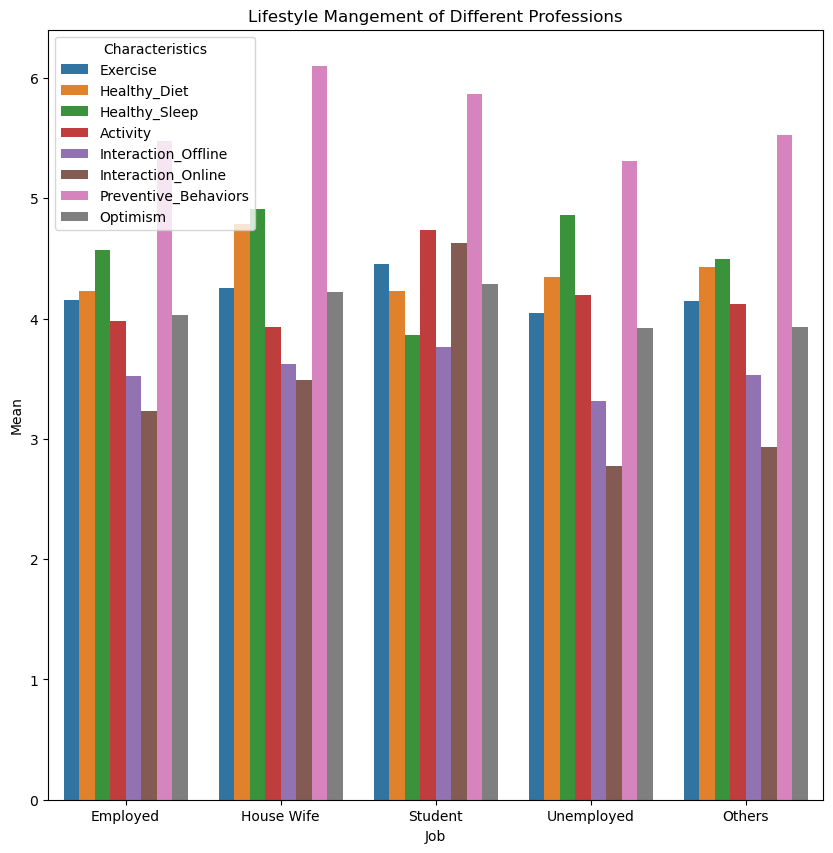

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x='Job',y='Mean',hue='Lifestyle',data=new)
plt.title('Lifestyle Mangement of Different Professions')
plt.legend(title='Characteristics',loc='upper left')

From the above bar plot we can analyze that the lifestyle of a house-wife is comparitively better than all others and they take many preventive measures than the other people.

# Null Hypothesis: The stress levels in beween different age groups are similar.
After analysis we can accept or reject he null hypothesis.

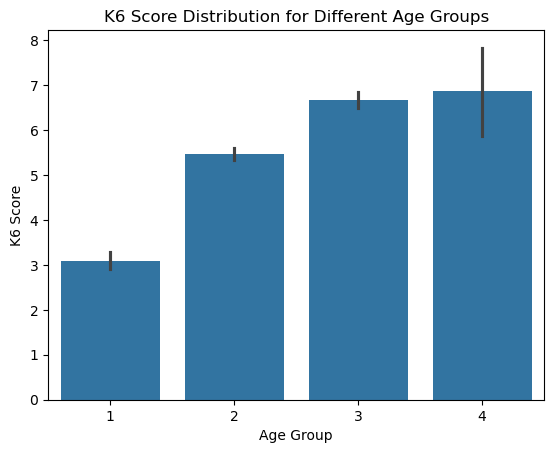

In [24]:
# Firstly we have to observe the distribution of stress levels in between different age groups. for that we can observe it with
# the help of a bar plot
sns.barplot(df,x='Age_Group', y='K6')
plt.title('K6 Score Distribution for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('K6 Score')
plt.show()


In [25]:
# The age groups 1 2 3 4 mean that they are of the age category
key.values[3]

array(['1 = ≥65 yrs., 2 = 40-64 yrs., 3 = 20-39 yrs., 4 = 18-19 yrs.'],
      dtype=object)

We can observe the average K6 values of age group 4 are the highest, which is of the age-group 18-19 years.
Let us now observe the number of people present in each group.

In [26]:
df['Age_Group'].value_counts()

Age_Group
2    6024
3    3745
1    1421
4     143
Name: count, dtype: int64

Here to prove this null hyothesis, we have to observe the data first. In the data we have four categories of age groups i.e one variable and greater than 2 categories. The outcome is also non parametric.

 So we can perform Kruskal Wallis Test 

1. The null hypothesis (H0): The median is the same for all the data groups.
2. The alternative hypothesis: (Ha): The median is not equal for all the data groups.

In [27]:
from scipy.stats import kruskal
alpha = 0.05
K6_age_group_1 = df[df['Age_Group'] == 1]['K6']
K6_age_group_2 = df[df['Age_Group'] == 2]['K6']
K6_age_group_3 = df[df['Age_Group'] == 3]['K6']
K6_age_group_4 = df[df['Age_Group'] == 4]['K6']
stats =kruskal(K6_age_group_1, K6_age_group_2, K6_age_group_3,K6_age_group_4)

stats

KruskalResult(statistic=462.8327605830888, pvalue=5.404187921965555e-100)

In [28]:
if(stats.pvalue<alpha):
    print("Reject the Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

Reject the Null Hypothesis


So we have rejected the null hypothesis and we can say that the relation exists between the age-group and the K6 value
which detrmines the stress value

# Hypothesis: The location in which we live does not affect the stress or K6 levels and does not impact the psychological fitness.

In [29]:
df['Residence'].nunique()

7

In [30]:
# We can observe that there are 11333 different locations present
loc=key.iloc[0,:].values
loc

array(['1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chiba, 5 = Osaka, 6 = Hyogo, 7 = Fukuoka'],
      dtype=object)

We can observe that there are 7 locations present and we can analyze on these 7 locations and find whether the null hypothesis is true or false

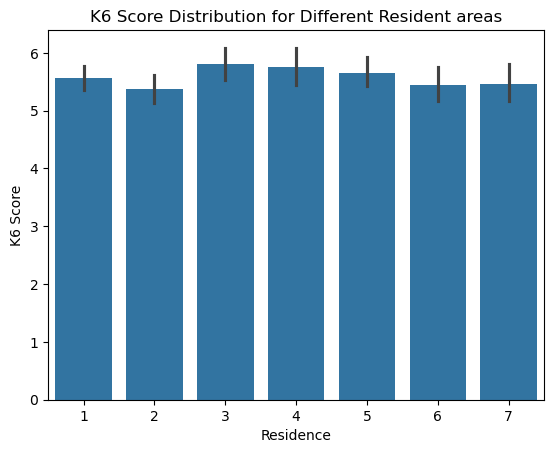

In [75]:
sns.barplot(df,x='Residence', y='K6')
plt.title('K6 Score Distribution for Different Resident areas')
plt.xlabel('Residence')
plt.ylabel('K6 Score')
plt.show()

The location wise K6 values are differing but not that much.

In [32]:
charac1=[]
for i in range(7):
    temp = df[df['Residence'] == i+1][lifestyle_characteristics].mean().reset_index()
    temp.columns = ['Lifestyle', 'Mean']
    temp['Location'] = i+1
    charac1.append(temp)

In [33]:
charac1

[              Lifestyle      Mean  Location
 0              Exercise  4.281710         1
 1          Healthy_Diet  4.445203         1
 2         Healthy_Sleep  4.643550         1
 3              Activity  4.118218         1
 4   Interaction_Offline  3.431189         1
 5    Interaction_Online  3.478980         1
 6  Preventive_Behaviors  5.654689         1
 7              Optimism  4.094143         1,
               Lifestyle      Mean  Location
 0              Exercise  4.222222         2
 1          Healthy_Diet  4.442297         2
 2         Healthy_Sleep  4.687064         2
 3              Activity  4.046699         2
 4   Interaction_Offline  3.602254         2
 5    Interaction_Online  3.278046         2
 6  Preventive_Behaviors  5.590446         2
 7              Optimism  4.096618         2,
               Lifestyle      Mean  Location
 0              Exercise  4.033019         3
 1          Healthy_Diet  4.234501         3
 2         Healthy_Sleep  4.574798         3
 3      

In [34]:
req_df=pd.concat(charac1)

In [35]:
req_df

,Lifestyle,Mean,Location
0,Exercise,4.281710,1
1,Healthy_Diet,4.445203,1
2,Healthy_Sleep,4.643550,1
3,Activity,4.118218,1
4,Interaction_Offline,3.431189,1
5,Interaction_Online,3.478980,1
6,Preventive_Behaviors,5.654689,1
7,Optimism,4.094143,1
0,Exercise,4.222222,2
1,Healthy_Diet,4.442297,2


In [36]:
loc

array(['1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chiba, 5 = Osaka, 6 = Hyogo, 7 = Fukuoka'],
      dtype=object)

In [37]:
mapy={1:'Tokyo', 2: 'Kanagawa', 3 :'Saitama', 4: 'Chiba', 5: 'Osaka', 6: 'Hyogo', 7: 'Fukuoka'}
req_df['Location']=req_df['Location'].map(mapy)

In [38]:
req_df

,Lifestyle,Mean,Location
0,Exercise,4.281710,Tokyo
1,Healthy_Diet,4.445203,Tokyo
2,Healthy_Sleep,4.643550,Tokyo
3,Activity,4.118218,Tokyo
4,Interaction_Offline,3.431189,Tokyo
5,Interaction_Online,3.478980,Tokyo
6,Preventive_Behaviors,5.654689,Tokyo
7,Optimism,4.094143,Tokyo
0,Exercise,4.222222,Kanagawa
1,Healthy_Diet,4.442297,Kanagawa


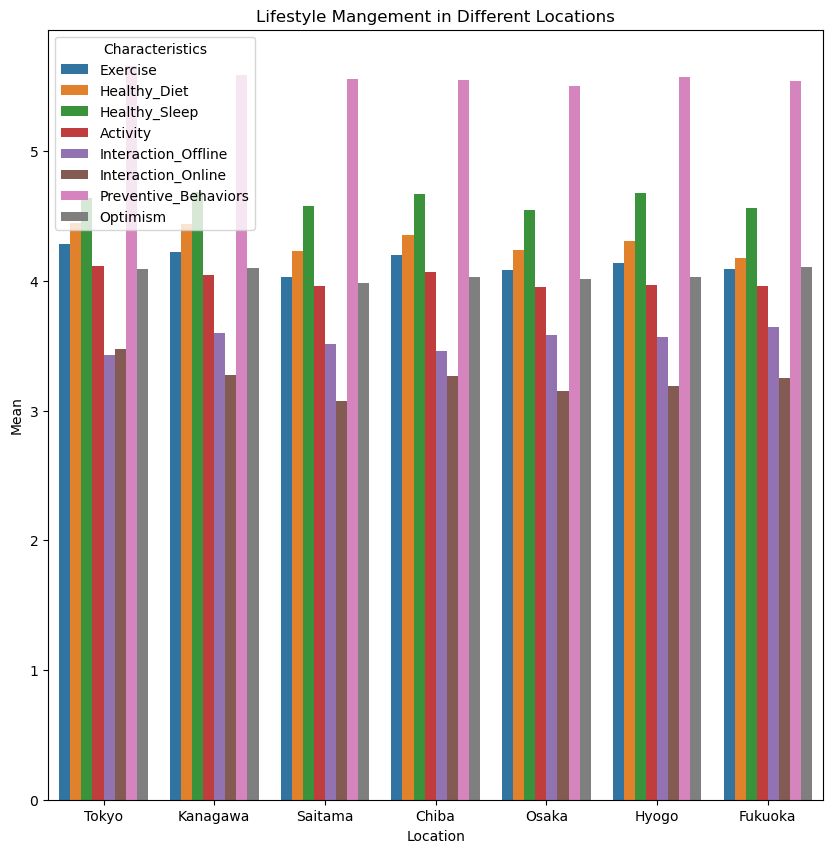

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x='Location',y='Mean',hue='Lifestyle',data=req_df)
plt.title('Lifestyle Mangement in Different Locations')
plt.legend(title='Characteristics',loc='upper left')

 We can observe that the location in which we live does not affect our lifestyle management

# Now we find the average K6 values for different professions

In [76]:
prof_1=df[df['Job_Group']==1]['K6'].mean()
prof_2=df[df['Job_Group']==2]['K6'].mean()
prof_3=df[df['Job_Group']==3]['K6'].mean()
prof_4=df[df['Job_Group']==4]['K6'].mean()
prof_5=df[df['Job_Group']==5]['K6'].mean()

In [78]:
prof_K6_avg=[prof_1,prof_2,prof_3,prof_4,prof_5]

In [79]:
prof_K6_avg

[5.608458035133377,
 5.6151716500553706,
 6.599508599508599,
 4.7088014981273405,
 6.209809264305177]

In [43]:
prof_name=[ 'Tokyo','Kanagawa','Saitama','Chiba','Osaka','Hyogo','Fukuoka']

In [80]:
loc_name=['Employed', 'House Wife',  'Student', 'Unemployed', 'Others']

In [84]:
data={'K6_avg':[5.608458035133377,
 5.6151716500553706,
 6.599508599508599,
 4.7088014981273405,
 6.209809264305177],'Profession':['Employed', 'House Wife',  'Student', 'Unemployed', 'Others']}

In [85]:
reqd_2=pd.DataFrame(data)

In [86]:
reqd_2

,K6_avg,Profession
0,5.608458,Employed
1,5.615172,House Wife
2,6.599509,Student
3,4.708801,Unemployed
4,6.209809,Others


We can observe that the average K6 values are highest in students and in others.
The least K6 average value is in unemployed which tells us that the stress levels due to psychological problems are comparitively less.

Text(0.5, 1.0, 'K6 averge value in Different Professions')

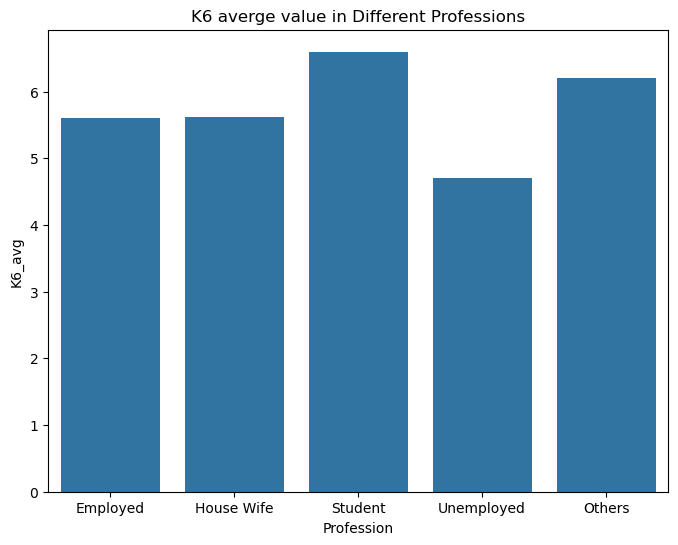

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x='Profession',y='K6_avg',data=reqd_2)
plt.title('K6 averge value in Different Professions')

We have analysed the major categories by which we can classify and analyze the stress levels. Now we can analyze other categories like martial_status etc and try to exract more information from the data

 Comparision of married vs unmarried

In [99]:
married_K6 = df[df['Married'] == 2]['K6']
unmarried_K6 = df[df['Married'] == 1]['K6']

In [106]:
print("Average K6 values of married:",married_K6.mean())
print("Average K6 values of unmarried:",unmarried_K6.mean())
final=pd.concat([married_K6,unmarried_K6])

Average K6 values of married: 4.988215249183587
Average K6 values of unmarried: 6.551048951048951


We can observe a significant difference in average K6 values of married vs unmarried.
Now we should compare their preventive measures

`"I spontaneously refrained from going out or altruistically took preventive behaviors (e.g. wearing a mask) to prevent coronavirus disease 2019 infection to my family or other people." 1 = not at all, 7 = extremely`

In [101]:
married_prev = df[df['Married'] == 2]['Preventive_Behaviors']
unmarried_prev = df[df['Married'] == 1]['Preventive_Behaviors']

In statistical way to compare the both groups we can use Cohen's d test.It is a test by which we can generally compare two different groups.

In [103]:
def cohens_d(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)
    n_x = len(x)
    n_y = len(y)
    pooled_std = np.sqrt(((n_x - 1) * std_x**2 + (n_y - 1) * std_y**2) / (n_x + n_y - 2))
    d = (mean_x - mean_y) / pooled_std
    return d

In [123]:
print("The cohen's d statistic value for the two groups is given by(prevetive behaviour):",cohens_d(married_prev,unmarried_prev))

The cohen's d statistic value for the two groups is given by(prevetive behaviour): 0.09545906855629184


The negative value indicates the direcion

From the above test we can analyze that: 
1. The preventive behaviour in both the groups is almost same
2. But the K6 value is slightly higher in the case of unmarried

1. ( 1 -> Unmarried)
2.  (2 -> Married)

Now consider the effect of income deterioration on the K6 and frustration values
`"The family budget has tightened." 1 = not at all, 7 = extremely`

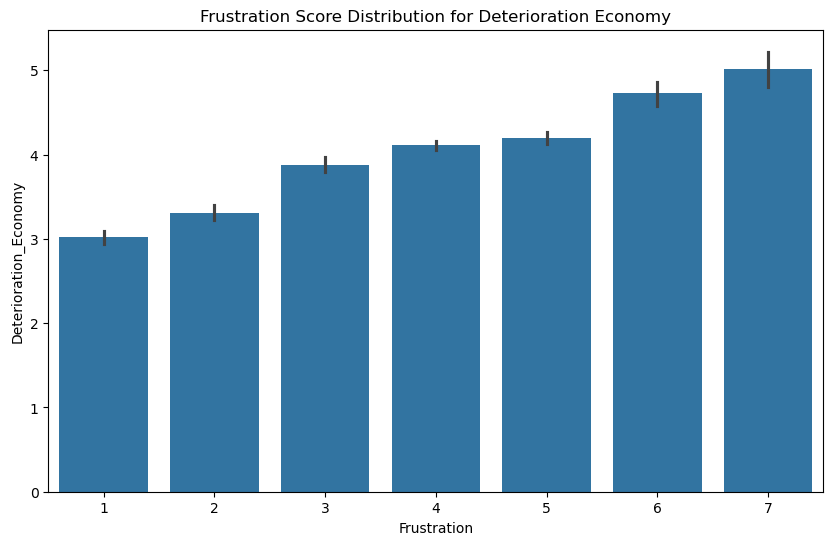

Text(0.5, 1.0, 'K6 Score Distribution for Deterioration Economy')

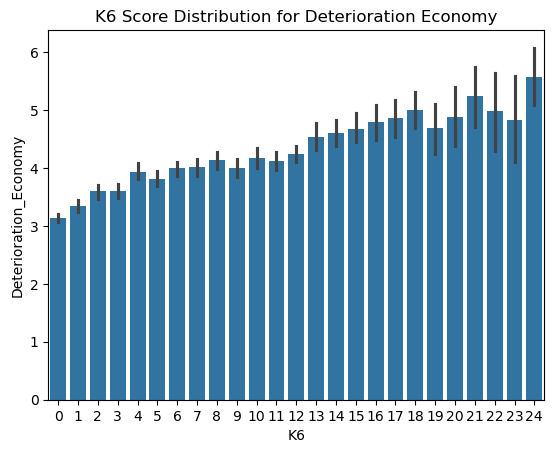

In [116]:
plt.figure(figsize=(10, 6))
sns.barplot(y='Deterioration_Economy', x='Frustration', data=df)
plt.title('Frustration Score Distribution for Deterioration Economy')
plt.show()
sns.barplot(y='Deterioration_Economy', x='K6', data=df)
plt.title('K6 Score Distribution for Deterioration Economy')

In [138]:
no_m=df[df['Married']==1]

In [139]:
no_m

,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,Current_Physical,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
ID,,,,,,,,,,,,,,,,,,,,,
10,5,1,51,2,1,2,2,1,2.0,2,...,4,4,4,4,4,4,4,4,4,4
12,1,1,48,2,1,2,2,1,3.0,2,...,1,5,4,1,1,1,2,1,5,2
14,3,2,52,2,1,2,2,1,2.0,2,...,2,2,3,3,3,3,3,3,2,3
15,6,1,45,2,1,2,1,1,4.0,2,...,1,1,4,1,1,1,1,1,3,6
22,7,1,58,2,1,2,2,1,3.0,1,...,4,4,4,5,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11327,1,2,19,4,3,2,2,1,3.0,2,...,4,4,1,4,4,4,4,4,4,4
11329,7,1,37,3,5,2,2,1,7.0,2,...,1,7,7,7,1,4,7,4,1,1
11330,3,2,41,2,1,2,2,1,7.0,2,...,2,5,4,4,4,5,5,4,3,6


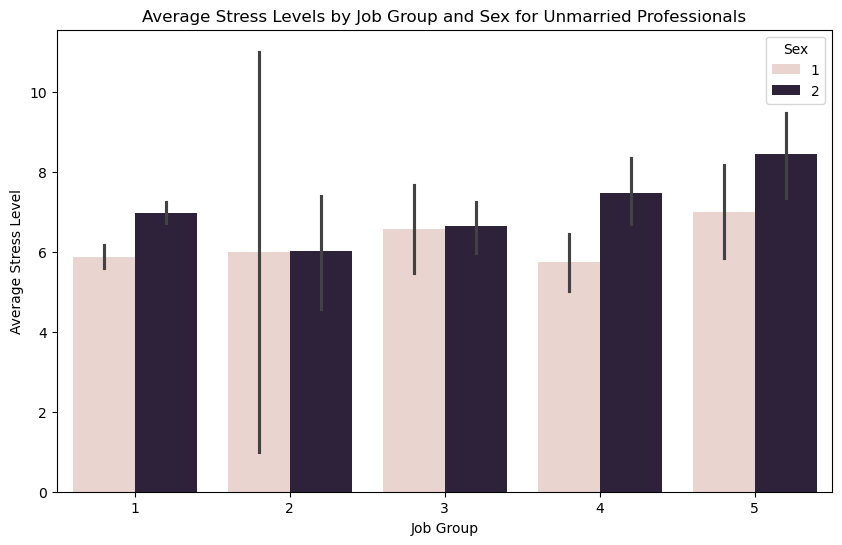

In [140]:

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Group', y='K6', hue='Sex', data=new, )
plt.title('Average Stress Levels by Job Group and Sex for Unmarried Professionals')
plt.xlabel('Job Group')
plt.ylabel('Average Stress Level')
plt.show()


In [135]:
m=df[df['Married']==2]

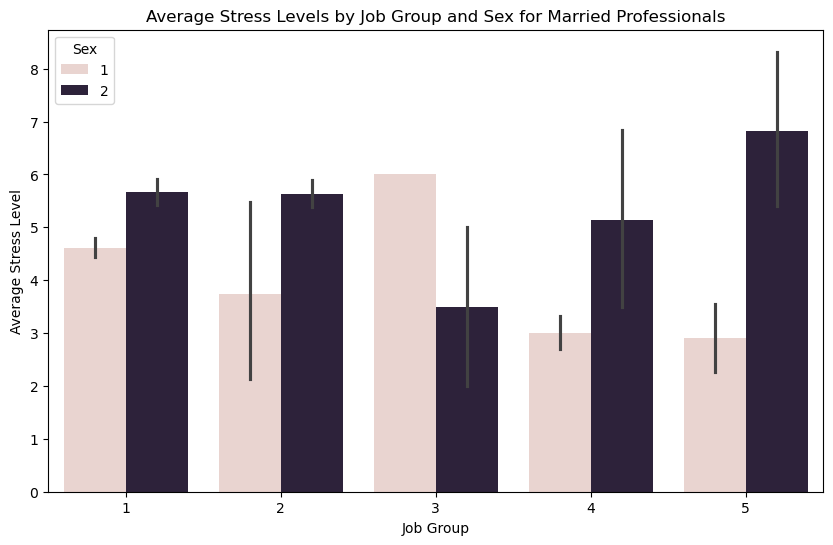

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Group', y='K6', hue='Sex', data=m, )
plt.title('Average Stress Levels by Job Group and Sex for Married Professionals')
plt.xlabel('Job Group')
plt.ylabel('Average Stress Level')
plt.show()


# Conclusion:

Covid-19 has impacted the lives of many people in different ways. In the daaset we found different factors and after analyzing the major factors, we can conclude that:
1. Diet and sleeping habits completely changed.
2. The average K6 values are highest in students and in others.
3. The least K6 average value is in unemployed which tells us that the stress levels due to psychological problems due to covid-19 are comparitively less.
4. The lifestyle mangagement habits did not change w.r.t the location but changed w.r.t the profession they work in.
5. The stress levels in healthcare workers are comparitively higher than those of non-healthcare workers.
6. The most impacted ones are the the students and working professionals who are unmarried.